Topic 6.05  |  箭头图
# 向量场
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
import numpy as np
from sympy.functions import exp
import os

# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

### 定义符号函数

In [4]:
#define symbolic vars, function
x1,x2 = sympy.symbols('x1 x2')

f_x = x1*exp(-(x1**2 + x2**2))

#take the gradient symbolically
grad_f = [sympy.diff(f_x,var) for var in (x1,x2)]

f_x_fcn = sympy.lambdify([x1,x2],f_x)

#turn into a bivariate lambda for numpy
grad_fcn = sympy.lambdify([x1,x2],grad_f)

In [5]:
f_x

x1*exp(-x1**2 - x2**2)

In [6]:
grad_f

[-2*x1**2*exp(-x1**2 - x2**2) + exp(-x1**2 - x2**2),
 -2*x1*x2*exp(-x1**2 - x2**2)]

### 产生数据

In [33]:
# 细腻颗粒度
xx1, xx2 = np.meshgrid(np.linspace(-2,2,401),np.linspace(-2,2,401))

# 粗糙颗粒度
xx1_, xx2_ = np.meshgrid(np.linspace(-2,2,21),np.linspace(-2,2,21))
V = grad_fcn(xx1_,xx2_)


ff_x = f_x_fcn(xx1,xx2)
ff_x_ = f_x_fcn(xx1_,xx2_)

color_array = np.sqrt(V[0]**2 + V[1]**2)

### 平面向量场

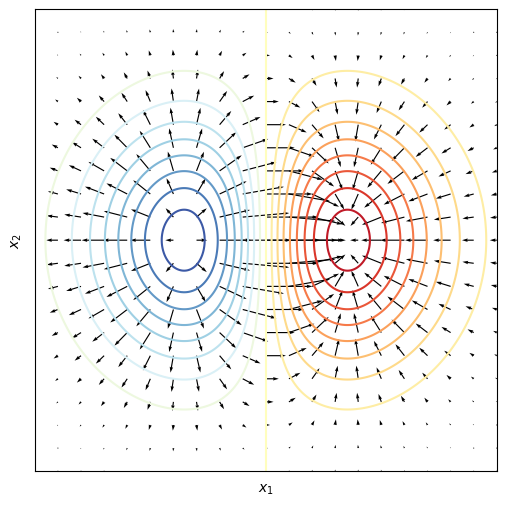

In [21]:
fig, ax = plt.subplots(figsize=(6,6))

ax.contour(xx1, xx2, ff_x, 20, cmap = 'RdYlBu_r')
    
ax.quiver(xx1_, xx2_, V[0], V[1],
          width = 0.0025,
          color = 'k')

ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
plt.xlim(-2,2)
plt.ylim(-2,2)

ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

fig.savefig('Figures/平面向量场.svg', format='svg')

### 三维向量场

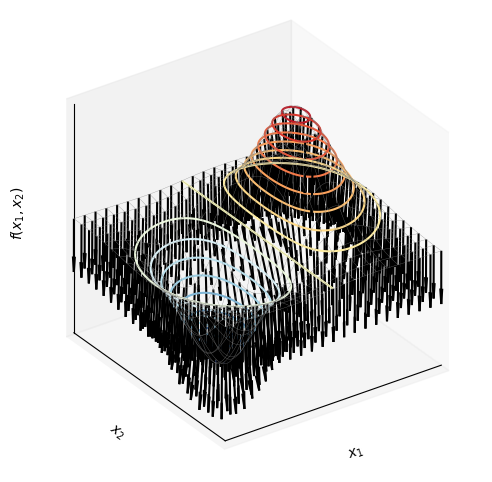

In [34]:
# 粗糙颗粒度
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(projection='3d')

ax.plot_wireframe(xx1, xx2, ff_x, 
                  rstride=20, 
                  cstride=20, 
                  color = [0.5,0.5,0.5],
                  linewidth = 0.2)
ax.contour3D(xx1, xx2, ff_x, 20, cmap = 'RdYlBu_r')

lengths = np.sqrt(V[0]**2+V[1]**2+1**2)
# 计算每个法向量的长度

for x1,y1,z1,u1,v1,w1,l in zip(xx1_.flatten(),
                               xx2_.flatten(),
                               ff_x_.flatten(),
                               V[0].flatten(), 
                               V[1].flatten(), 
                               V[0].flatten()*0 - 1,
                               lengths.flatten()):
    
    ax.quiver(x1, y1, z1, u1, v1, w1, 
              length=l*0.2,
              color = 'k')

ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.zaxis.set_ticks([])

ax.set_box_aspect([1,1,1])
plt.xlim(-2,2)
plt.ylim(-2,2)
ax.view_init(30, -125)
ax.set_proj_type('ortho')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1,x_2)$')

fig.savefig('Figures/三维向量场.svg', format='svg')

In [ ]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023